<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2023-08-20 15:56:43.818672: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-20 15:56:44.010164: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-20 15:56:45.010834: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-20 15:56:45.011782: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-20 15:56:46.041307: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 9s 1us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

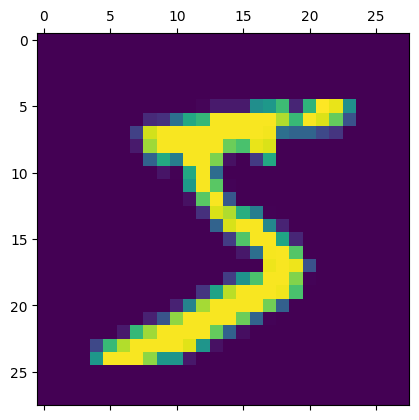

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [13]:
X_train_flattened.shape

(60000, 784)

In [14]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

<img src="digits_nn.jpg" />

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

2023-08-20 15:58:27.925122: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/5
1875/1875 [==============================] - 1s 493us/step - loss: 0.4687 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 1s 484us/step - loss: 0.3041 - accuracy: 0.9160
Epoch 3/5
1875/1875 [==============================] - 1s 495us/step - loss: 0.2833 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 1s 476us/step - loss: 0.2730 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 1s 494us/step - loss: 0.2666 - accuracy: 0.9263


In [16]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 470us/step - loss: 0.2651 - accuracy: 0.9266


[0.2651004195213318, 0.9265999794006348]

In [17]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 438us/step


array([2.6101472e-02, 2.8709329e-07, 9.7608395e-02, 9.4662303e-01,
       3.1915864e-03, 1.2797350e-01, 2.1894887e-06, 9.9978530e-01,
       1.1322496e-01, 7.0728385e-01], dtype=float32)

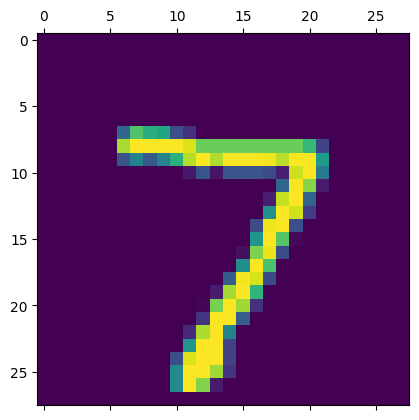

In [18]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [19]:
np.argmax(y_predicted[0])

7

In [20]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [21]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [22]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 949,    0,    4,    2,    0,    7,   13,    2,    3,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   3,    8,  934,   14,    8,    2,   13,   10,   36,    4],
       [   3,    0,   22,  905,    1,   34,    3,   10,   24,    8],
       [   1,    1,    5,    1,  914,    0,   10,    4,   10,   36],
       [   8,    3,    4,   21,   11,  785,   20,    4,   29,    7],
       [   7,    3,    5,    1,    7,    8,  923,    2,    2,    0],
       [   1,    5,   25,    4,    7,    1,    0,  944,    4,   37],
       [   4,    7,    6,   17,    9,   25,   10,   11,  879,    6],
       [   7,    7,    2,    9,   28,    6,    0,   17,    9,  924]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

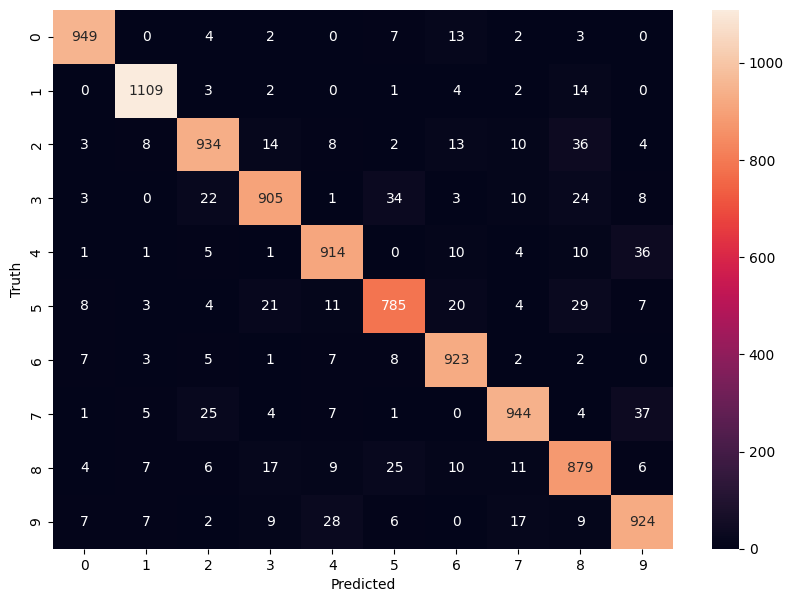

In [23]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [24]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 839us/step - loss: 0.2690 - accuracy: 0.9242
Epoch 2/5
1875/1875 [==============================] - 1s 784us/step - loss: 0.1230 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 1s 786us/step - loss: 0.0856 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 1s 789us/step - loss: 0.0650 - accuracy: 0.9809
Epoch 5/5
1875/1875 [==============================] - 1s 773us/step - loss: 0.0509 - accuracy: 0.9851


In [25]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 519us/step - loss: 0.0780 - accuracy: 0.9757


[0.07797472178936005, 0.9757000207901001]

313/313 [==============================] - 0s 554us/step


Text(95.72222222222221, 0.5, 'Truth')

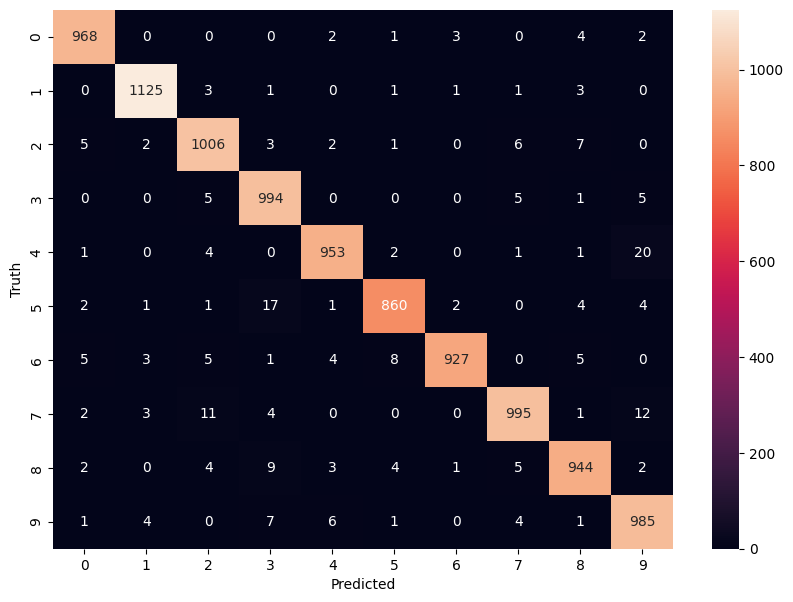

In [26]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 800us/step - loss: 0.2668 - accuracy: 0.9251
Epoch 2/10
1875/1875 [==============================] - 2s 803us/step - loss: 0.1194 - accuracy: 0.9648
Epoch 3/10
1875/1875 [==============================] - 1s 773us/step - loss: 0.0842 - accuracy: 0.9753
Epoch 4/10
1875/1875 [==============================] - 1s 785us/step - loss: 0.0639 - accuracy: 0.9808
Epoch 5/10
1875/1875 [==============================] - 1s 796us/step - loss: 0.0502 - accuracy: 0.9848
Epoch 6/10
1875/1875 [==============================] - 2s 835us/step - loss: 0.0407 - accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 1s 789us/step - loss: 0.0339 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 1s 785us/step - loss: 0.0269 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 1s 766us/step - loss: 0.0231 - accuracy: 0.9932
Epoch 10/10
1875/1875 [==============================] - 2s 879u

In [28]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 505us/step - loss: 0.0889 - accuracy: 0.9763


[0.08886474370956421, 0.9763000011444092]